In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [3]:
x_orig = np.array([61789, 22899, 68500, 54000, 65674, 60949, 93000, 48235, 76025, 67000, 97500, 74000, 63060, 82029, 84000, 144500, 89000, 166800, 114800, 176000, 185530, 150500, 139800, 240000])
y_orig = np.array([8290, 7990, 7990, 7990, 7555, 7490, 6990, 6900, 6900, 6800, 6800, 6600, 6390, 6390, 6200, 5999, 5990, 5800, 5350, 5250, 4450, 4400, 3800, 3650])



In [4]:
x = np.array([1.00, 0.54, 0.59, 0.75, 0.71, 0.42, 0.66, 0.30, 0.56, 0.28, 0.27, 0.18, 0.24, 0.34, 0.20, 0.24, 0.12, 0.32, 0.18, 0.20, 0.14, 0.21, 0.00, 0.18])
y = np.array([0.00, 0.03, 0.16, 0.17, 0.34, 0.37, 0.46, 0.50, 0.51, 0.55, 0.59, 0.59, 0.64, 0.68, 0.68, 0.70, 0.70, 0.72, 0.83, 0.84, 0.94, 0.94, 0.94, 1.00])


In [16]:
def cost_2(Y, error):
    J = (error.T).dot(error)/(2*len(Y))
    return J


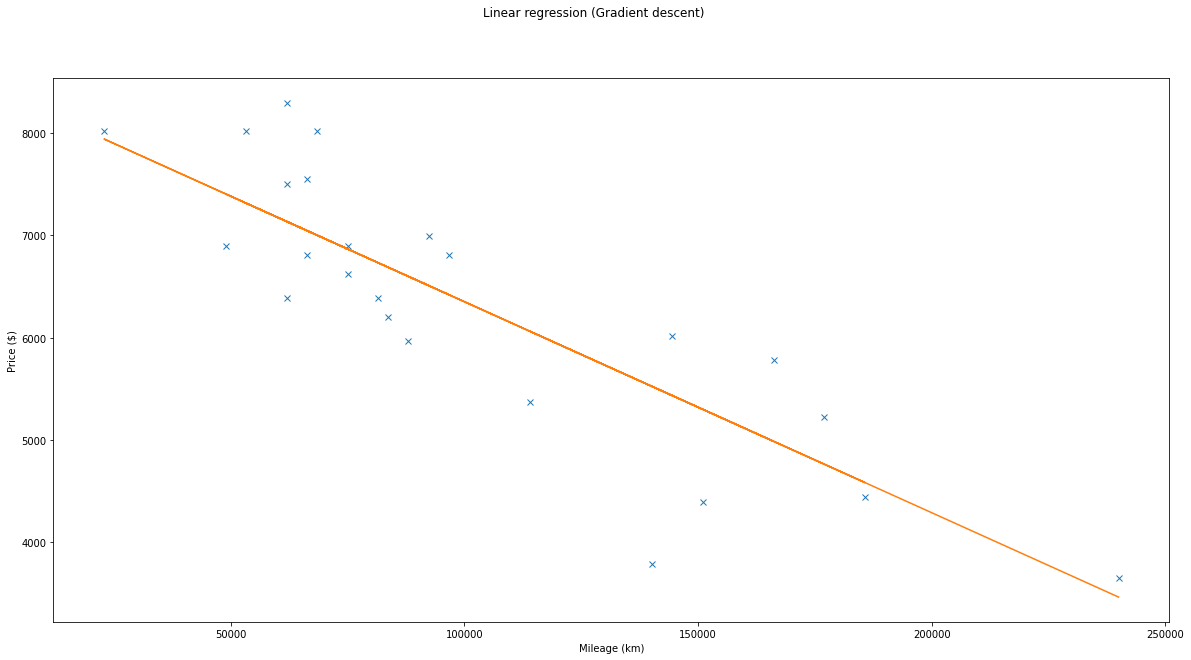

[[ 8.40921419e+03]
 [-2.05965088e-02]]


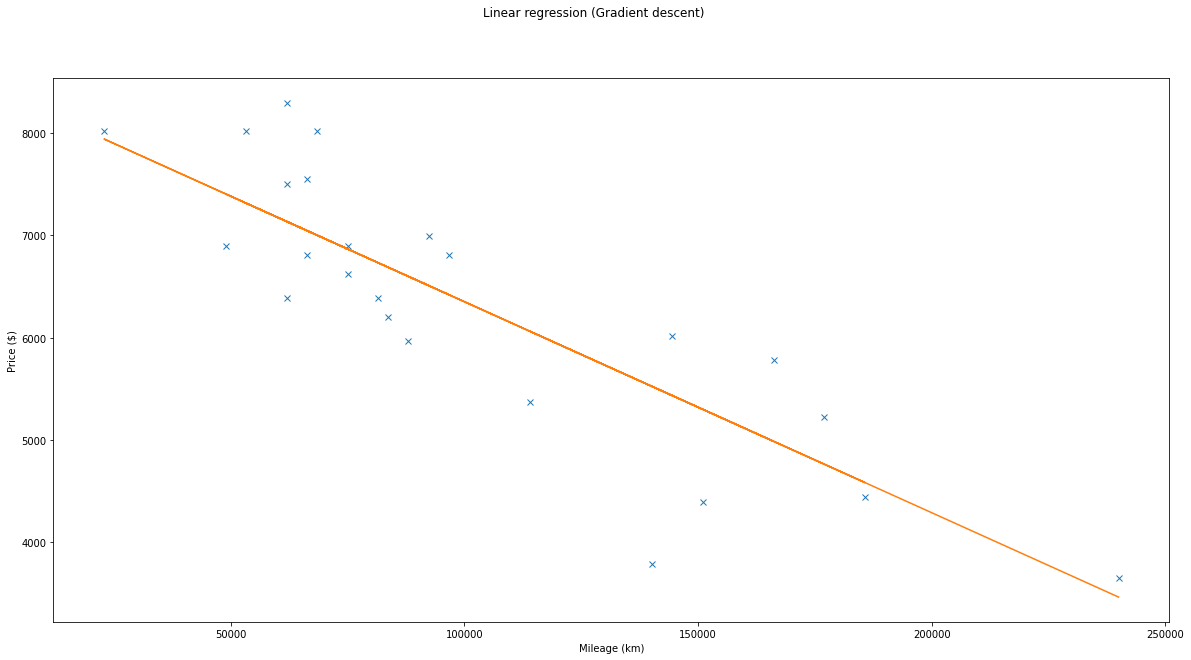

In [38]:
min_x = np.min(x_orig)
max_x = np.max(x_orig)
min_y = np.min(y_orig)
max_y = np.max(y_orig)
value_range_x = max_x - min_x
value_range_y = max_y - min_y

plt.figure(figsize=(20, 10))
plt.plot(min_x + x * value_range_x, min_y + y * value_range_y, 'x')

alpha = 0.1 # Specify the learning rate
theta =  np.array([[0.0,-0.0]]).T # Initial values of theta

X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 100
cost_history=[]
theta_history=[]
line_1 = plt.plot(min_x + x * value_range_x, min_y + (theta[0] + x * theta[1]) * value_range_y)
plt.suptitle('Linear regression (Gradient descent)')
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(4)
for i in range(num_iters):
    time.sleep(0.3)
    predicted_Y = X.dot(theta)
    error = predicted_Y - Y
    a = (theta[0] - alpha * (1/len(Y)) * np.sum(error)).item()
    b = (theta[1] - alpha * (1/len(Y)) * np.sum(X_1.dot(error))).item()
    cost_history.append(cost_2(Y, error))
    theta_history.append(theta)
    theta = np.array([[a],[b]])
    line = line_1.pop(0)
    line.remove()
    line_1 = plt.plot(min_x + x * value_range_x, min_y + (a+x*b) * value_range_y)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    if i == 20:
        alpha = 0.8
theta[1] = theta[1] * value_range_y / value_range_x
theta[0] = theta[0] * value_range_y
theta[0] += min_y
theta[0] -= theta[1] * min_x
print(theta)
